In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (classification_report
                             , confusion_matrix
                             , accuracy_score)

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# Create a pandas DataFrame
df = pd.DataFrame(data=np.c_[cancer['data']
                  , cancer['target']]
                  , columns=np.append(cancer['feature_names']
                                      ,['target']))

# Display the first few rows of the dataframe

df.head()
df.info()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Verify shapes
X.shape, y.shape

((569, 30), (569,))

In [8]:
# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27)
                                                    
# Verify shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data only to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test data
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize SVM classifier with default parameters
svm_base = SVC(random_state=27)

# Train the model
svm_base.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_base = svm_base.predict(X_test_scaled)

# Evaluate base model performance
accuracy_score(y_test, y_pred_base)

SVC(random_state=27)

0.9824561403508771

In [22]:
svm_base.


<bound method BaseEstimator.get_params of SVC(random_state=27)>

In [38]:
# Define parameter grid
param_grid = {
    'C': np.logspace(-3, 2, 20)  # Regularization parameter
    # [0.001, 0.01, 0.1, 1.0, 10.0]
   # , 'gamma': np.logspace(-3, 0, 10)
    , 'gamma':['scale','auto', np.logspace(-3, 0, 10)] #   # Kernel coefficient
    , 'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=27)
                           , param_grid
                           , cv=5
)

# Perform grid search on training data
grid_search.fit(X_train_scaled, y_train)

# View best parameters found
grid_search.best_params_

GridSearchCV(cv=5, estimator=SVC(random_state=27),
             param_grid={'C': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02]),
                         'gamma': ['scale', 'auto',
                                   array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])],
                         'kernel': ['rbf', 'linear', 'poly']})

{'C': 8.858667904100823, 'gamma': 'scale', 'kernel': 'rbf'}

In [35]:
np.logspace(-3, 1, 5).tolist()
np.logspace(-3, 2, 20).tolist()
np.logspace(-3, 0, 10).tolist()

[0.001, 0.01, 0.1, 1.0, 10.0]

[0.001,
 0.0018329807108324356,
 0.003359818286283781,
 0.006158482110660267,
 0.011288378916846888,
 0.02069138081114789,
 0.0379269019073225,
 0.06951927961775606,
 0.12742749857031335,
 0.23357214690901212,
 0.42813323987193913,
 0.7847599703514607,
 1.438449888287663,
 2.636650898730358,
 4.832930238571752,
 8.858667904100823,
 16.23776739188721,
 29.763514416313193,
 54.555947811685144,
 100.0]

[0.001,
 0.0021544346900318843,
 0.004641588833612777,
 0.01,
 0.021544346900318832,
 0.046415888336127774,
 0.1,
 0.21544346900318823,
 0.46415888336127775,
 1.0]

In [39]:
# Get best estimator from grid search
svm_optimized = grid_search.best_estimator_

# Make predictions with optimized model
y_pred_optimized = svm_optimized.predict(X_test_scaled)

# Evaluate optimized model
accuracy_score(y_test, y_pred_optimized)

0.9824561403508771

In [40]:
# Classification report
print(classification_report(y_test, y_pred_optimized))

# Confusion matrix
confusion_matrix(y_test, y_pred_optimized)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        45
         1.0       0.97      1.00      0.99        69

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



array([[43,  2],
       [ 0, 69]])

In [26]:
from svm_margin_plot import plot_svm_boundary

ValueError: X has 2 features, but SVC is expecting 30 features as input.

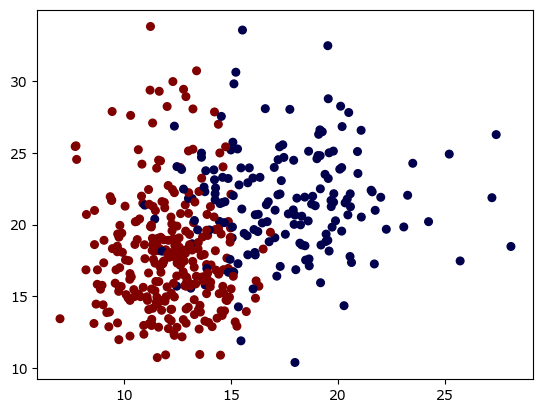

In [31]:
plot_svm_boundary(
    svm_optimized, X_train, y_train
)